# Moving Average Strategy Evaluation

In the Moving-Average (MA) strategy, we will explore adding a MA filter in addition to an existing oscillator polarity and absolute value filter. The MA is a technical momentum indicator which is used to identify market trends.

When we refer to the MA strategy, this is actually a three layered composite strategy as illustrated by the table below. By applying all filters jointly, we obtain refined filter trading signals.

|MA Composite Strategy|
|-|
|Filter 1 (Trades with correct oscillator polarity)|
|Filter 2 (Trades with oscillator value between -7 to 7)|
|MA|


Based on the calculation across the different MA strategy parameters, we can find the best strategy as defined by the average annualised metric performance across 21 years. Thereafter we can obtain relevant statistics about the strategy's performance such as:
- Average annualised return metric
- Standard deviation of the annualised return metric across 21 years
- Average annualised return per unit of standard deviation risk (reward-to-risk)
- Filter trade signal counts
- Average portfolio cumulative return (based on equal stock weightage)
- Average holding time in days per trade signal

To find the best MA window, we decided to search for an ideal parameter ranging from 1 day up to 20 days. We will begin by using a step size of 1 day and thereafter lower the step size to narrow our search.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from os import listdir
from os.path import isfile, join
import altair as alt
from tqdm import tqdm
pd.options.mode.chained_assignment = None
from functions import *

## Buy Only

In [2]:
ma_list = np.arange(1,20)
Buy_result= backtest_ma(ma_list, 'buy_only')

In [3]:
df = pd.DataFrame(Buy_result)

Text(0.5, 1.0, 'Annualized Return Vs. MA Window Size (Buy Only)')

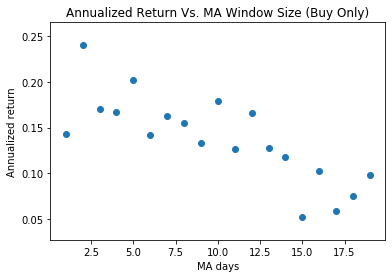

In [5]:
plt.scatter(y = df.T.mean(), x = np.arange(1,20))
plt.xlabel('MA days')
plt.ylabel('Annualized return')
plt.title('Annualized Return Vs. MA Window Size (Buy Only)')

As we can see from the plot above, the peak is located around 2 days. Therefore, we will narrow down our search from 1 to 3 days with step size of 1/13 day.

In [5]:
ma_list_fine = np.arange(13, 39)/13
Buy_result_fine = backtest_ma(ma_list_fine, 'buy_only')

In [6]:
(np.arange(13, 39)/13)[np.argmax(np.array([pd.DataFrame(Buy_result_fine).T.mean()]))]

2.1538461538461537

In [7]:
print(2.1538461538461537 *13)
np.max(np.array([pd.DataFrame(Buy_result_fine).T.mean()]))

28.0


0.26845657754560803

Window size of 2.153 (28/13) days gives us highest annualized return 26.846%.

In [8]:
ma_result_buy = get_stats('buy_only', 2.1538461538461537)

In [9]:
ma_result_buy['index']= ['MA(28/13)']
ma_result_buy=ma_result_buy.set_index('index')
ma_result_buy.index.name = None
ma_result_buy

,filter_counts,avg_port_cum_return,avg_holding_time_per_signal,avg_metric,std_metric,avg_metric/std_metric
MA(28/13),41477,2.363509,0.852331,0.268457,0.373756,0.718267


In [20]:
ma_result_buy.to_csv('../Output_strategy_statistics/result_ma_buy.csv')

## Sell Only

The following code below is repeated for the sell strategy.

Text(0.5, 1.0, 'Annualized Return Vs. MA Window Size (Sell Only)')

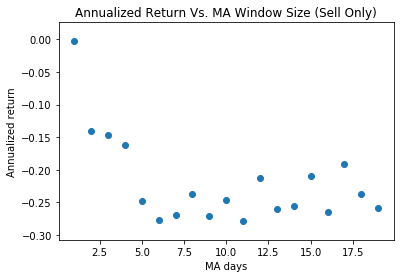

In [7]:
ma_list = np.arange(1,20)
sell_result= backtest_ma(ma_list, 'sell_only')
df = pd.DataFrame(sell_result)
plt.scatter(y = df.T.mean(), x = np.arange(1,20))
plt.xlabel('MA days')
plt.ylabel('Annualized return')
plt.title('Annualized Return Vs. MA Window Size (Sell Only)')

As we can see from the plot above, the peak is located around 1 day. Similarly, we will narrow down in this location and search from 0 to 2 days with step size of 1/13 day.

In [8]:
ma_list_fine = np.arange(0, 26)/13
sell_result_fine = backtest_ma(ma_list_fine, 'sell_only')

In [9]:
print(ma_list_fine[np.argmax(np.array(pd.DataFrame(sell_result_fine).T.mean().dropna()))+1])
print(1 *13)
print(np.max(np.array([pd.DataFrame(sell_result_fine).T.mean().dropna()])))

1.0
13
-0.002943840155498941


Text(0.5, 1.0, 'Annualized Return Vs. MA Window Size (Sell Only)')

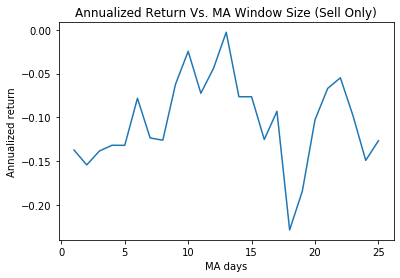

In [11]:
plt.plot(pd.DataFrame(sell_result_fine).T.mean().dropna())
plt.xlabel('MA days')
plt.ylabel('Annualized return')
plt.title('Annualized Return Vs. MA Window Size (Sell Only)')

We can see that the MA filter did not do a good job in the short strategy as all annualized returns are below zero. Nonetheless, a window size of 1 (13/13) day provides us with the highest annualized return of -0.29%.

In [15]:
ma_result_sell = get_stats('sell_only', 1)

In [16]:
ma_result_sell['index']= ['MA(13/13)']
ma_result_sell=ma_result_sell.set_index('index')
ma_result_sell.index.name = None
ma_result_sell

,filter_counts,avg_port_cum_return,avg_holding_time_per_signal,avg_metric,std_metric,avg_metric/std_metric
MA(13/13),34270,1.108416,0.77034,-0.002944,0.445983,-0.006601


In [17]:
ma_result_sell.to_csv('../Output_strategy_statistics/result_ma_sell.csv')

### Save Top Results Data For Bootstrapping

The following `get_annual` function is used to compile relevant data of the top performing buy and sell strategies and arrange them in a format which will be used for bootstrapping.

In [19]:
get_annual('buy_only', 28/13).to_csv('../../bootstrap/buy/top_ma_buy_annual.csv')
get_annual('sell_only', 13/13).to_csv('../../bootstrap/sell/top_ma_sell_annual.csv')